In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
ch43=pd.read_csv("C:/gskim/P4DS/data/ch43.csv")
df = pd.DataFrame(ch43, columns=['group', 'university', 'score'])
df.tail()

,group,university,score
25,g2,u3,644
26,g2,u3,621
27,g2,u3,677
28,g2,u3,667
29,g2,u3,700


In [3]:
formula = 'score ~ C(group) + C(university) + C(group):C(university)'
lm = ols(formula, df).fit()
table=sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                               sum_sq    df           F        PR(>F)
C(group)                516140.833333   1.0  454.342659  4.200267e-17
C(university)            43474.466667   2.0   19.134608  1.074618e-05
C(group):C(university)    2604.466667   2.0    1.146315  3.346004e-01
Residual                 27264.400000  24.0         NaN           NaN


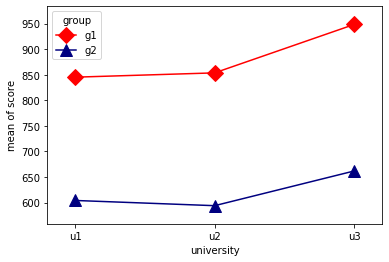

In [4]:
# Draw graph
fig = interaction_plot(df.university, df.group, df.score, 
                       colors=['red', 'navy'], markers=['D', '^'], ms=12)

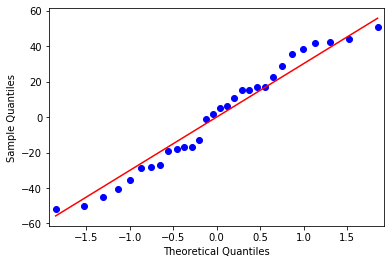

In [5]:
# draw qqplot
res = lm.resid
qq = sm.qqplot(res, line = 's')
plt.show()